In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
plt.style.use('ggplot')

In [7]:
dataFrame = pd.read_csv("../data/normalizedData.csv")
dataFrame = dataFrame[~np.isnan(dataFrame["Temperature"])]

In [11]:
dataFrame[dataFrame["Species"] == "Fence"].describe()

,Temperature,Height
count,187.000000,187.000000
mean,35.104278,44.381765
std,6.099117,83.614630
min,17.600000,0.000000
25%,31.500000,0.000000
50%,34.000000,8.000000
75%,37.800000,42.250000
max,58.400000,500.000000


In [12]:
dataFrame[dataFrame["Species"] == "Side-Blotched"].describe()

,Temperature,Height
count,157.000000,157.00000
mean,36.573885,7.39172
std,7.075537,13.02221
min,17.800000,0.00000
25%,32.400000,0.00000
50%,35.200000,0.00000
75%,40.000000,11.00000
max,59.400000,100.00000


In [8]:
def convertStringToDatetime(input):
    return datetime.datetime.strptime(input, '%H:%M').time()

In [9]:
dataFrame["Time"] = dataFrame["Time"].apply(convertStringToDatetime)

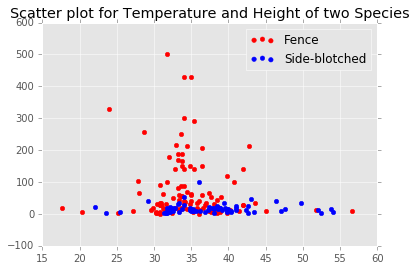

In [5]:
fence = dataFrame[dataFrame["Species"] == "Fence"]
# fence = fence[fence["Height"] > 0.0]
side = dataFrame[dataFrame["Species"] == "Side-Blotched"]
# side = side[side["Height"] > 0.0]
plt.scatter(fence[fence["Height"] > 0]["Temperature"], fence[fence["Height"] > 0]["Height"], color='red')
plt.scatter(side[side["Height"] > 0]["Temperature"], side[side["Height"] > 0]["Height"], color='blue')
plt.title("Scatter plot for Temperature and Height of two Species")
plt.legend(["Fence", "Side-blotched"])

In [6]:
t1 = datetime.datetime.combine(datetime.date.today(), datetime.datetime.strptime("13:00", '%H:%M').time())
t2 = datetime.datetime.combine(datetime.date.today(), datetime.datetime.strptime("16:00", '%H:%M').time())

In [7]:
sorted(dataFrame["Time"])[:-3]

[datetime.time(13, 5),
 datetime.time(13, 20),
 datetime.time(13, 29),
 datetime.time(13, 30),
 datetime.time(13, 32),
 datetime.time(13, 32),
 datetime.time(13, 32),
 datetime.time(13, 32),
 datetime.time(13, 34),
 datetime.time(13, 35),
 datetime.time(13, 35),
 datetime.time(13, 35),
 datetime.time(13, 37),
 datetime.time(13, 37),
 datetime.time(13, 37),
 datetime.time(13, 38),
 datetime.time(13, 38),
 datetime.time(13, 39),
 datetime.time(13, 40),
 datetime.time(13, 40),
 datetime.time(13, 41),
 datetime.time(13, 41),
 datetime.time(13, 42),
 datetime.time(13, 42),
 datetime.time(13, 43),
 datetime.time(13, 43),
 datetime.time(13, 43),
 datetime.time(13, 43),
 datetime.time(13, 43),
 datetime.time(13, 44),
 datetime.time(13, 44),
 datetime.time(13, 45),
 datetime.time(13, 45),
 datetime.time(13, 45),
 datetime.time(13, 45),
 datetime.time(13, 45),
 datetime.time(13, 45),
 datetime.time(13, 45),
 datetime.time(13, 46),
 datetime.time(13, 46),
 datetime.time(13, 46),
 datetime.time(13

In [8]:
n_bins = 12
time_box = t1 + (t2 - t1) * np.linspace(0, 1, n_bins+1)
new_time = [x.time() for x in time_box]
print(new_time)

[datetime.time(13, 0), datetime.time(13, 15), datetime.time(13, 30), datetime.time(13, 45), datetime.time(14, 0), datetime.time(14, 15), datetime.time(14, 30), datetime.time(14, 45), datetime.time(15, 0), datetime.time(15, 15), datetime.time(15, 30), datetime.time(15, 45), datetime.time(16, 0)]


In [9]:
time_col = dataFrame["Time"].values

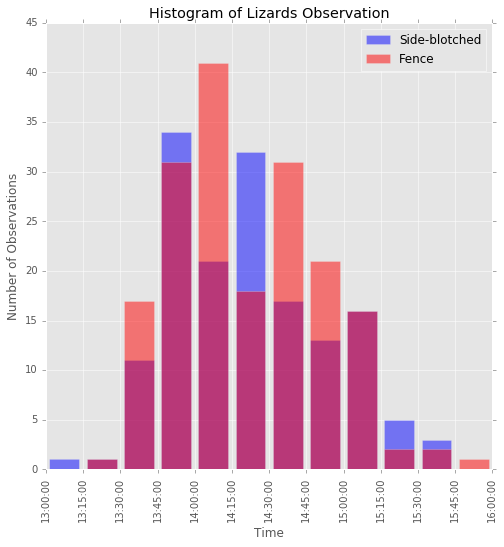

In [10]:
import matplotlib.dates
plt.figure(figsize=(8,8))
plt.hist(sorted(side["Time"])[:-3], 
         bins=n_bins, 
         alpha=0.5,
         color='blue',
         label='2',
         align='mid', 
         rwidth=0.8,
         histtype='bar',
         range=(datetime.time(13, 0), datetime.time(16, 0)))
plt.xlim(datetime.time(13, 0), datetime.time(16, 0))
plt.xticks(new_time, rotation=90)

plt.hist(sorted(fence["Time"])[:-3], 
         bins=n_bins, 
         alpha=0.5,
         color='red',
         label='2',
         align='mid', 
         rwidth=0.8,
         histtype='bar',
         range=(datetime.time(13, 0), datetime.time(16, 0)))
# plt.xlim(datetime.time(13, 0), datetime.time(16, 0))
# plt.xticks(new_time, rotation=45)
# plt.x_axis.set_major_formatter()
# plt.x_axis.set_major_formatter()
plt.title("Histogram of Lizards Observation")
plt.xlabel("Time")
plt.ylabel("Number of Observations")
plt.legend(['Side-blotched', 'Fence'])
plt.savefig("histogram_lizard_time.png")

([<matplotlib.axis.XTick at 0x116f111d0>,
 <a list of 13 Text xticklabel objects>)

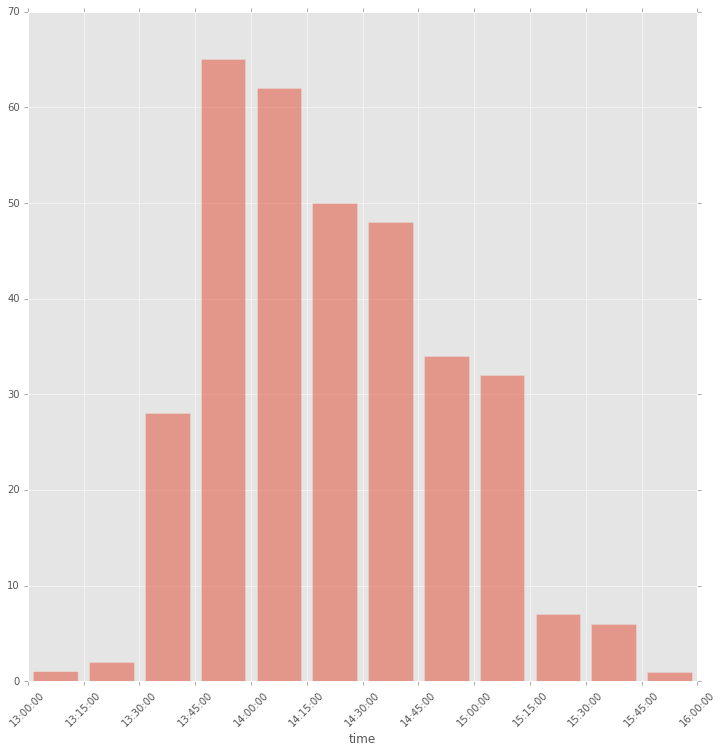

In [11]:
import matplotlib.dates
plt.figure(figsize=(12,12))
plt.hist(sorted(dataFrame["Time"])[:-3], 
         bins=n_bins, 
         alpha=0.5,
         label='2',
         align='mid', 
         rwidth=0.8,
         histtype='bar',
         range=(datetime.time(13, 0), datetime.time(16, 0)))
plt.xlim(datetime.time(13, 0), datetime.time(16, 0))
plt.xticks(new_time, rotation=45)
# plt.x_axis.set_major_formatter()

(0, 100)

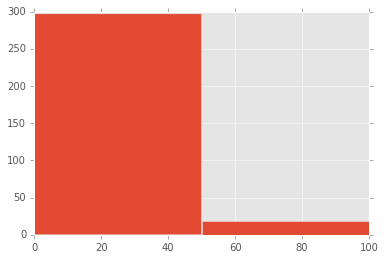

In [12]:
plt.hist(dataFrame["Height"], bins=10)
plt.xlim(0,100)

# Training

In [13]:
# Group by time
def groupByTime(val):
    return (val.hour - 13)*4 + (val.minute / 15)
dataFrame["Time"] = dataFrame["Time"].apply(groupByTime)

In [14]:
# Randomly select
dataFrame = dataFrame.sample(frac=1)

In [15]:
X = dataFrame.drop(["Species"], axis=1).as_matrix()
y = dataFrame["Species"].as_matrix()
y = np.array([int(i == "Fence") for i in y])

In [16]:
n = X.shape[0]
frac = 0.9
Xtrain = X[:int(frac*n),:]
ytrain = y[:int(frac*n)]
Xtest  = X[int(frac*n):,:]
ytest  = y[int(frac*n):]

In [17]:
print(Xtrain.shape)
print(Xtest.shape)
print(Xtrain[0])

(309, 4)
(35, 4)
[7.666666666666666 31.4 14.0 'Overcast']


In [18]:
import scipy
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [19]:
clf = MLPClassifier(solver='lbfgs',
                    alpha=1e-5,
                    hidden_layer_sizes=(200,200),
                    random_state=2,
#                     warm_start=True,
                   )
clf.fit(Xtrain[:,1].reshape(-1,1), ytrain.reshape(-1,1))

/Users/teerapatjenrungrot/anaconda3/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 200), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [20]:
clf.fit(Xtrain[:,:3],ytrain)
prediction = clf.predict(Xtest[:,:3])
print(prediction)
print(ytest)
print(np.array([int(prediction[i] == ytest[i]) for i in range(len(prediction))]))
print("Accuracy = {}".format(accuracy_score(ytest, prediction)))

[0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0]
[1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0]
[0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1]
Accuracy = 0.6


In [21]:
clf.predict_proba(Xtest[:,:3])

array([[  6.42233339e-01,   3.57766661e-01],
       [  2.53921328e-11,   1.00000000e+00],
       [  2.62246866e-02,   9.73775313e-01],
       [  5.56155860e-01,   4.43844140e-01],
       [  6.32735635e-01,   3.67264365e-01],
       [  4.16125945e-01,   5.83874055e-01],
       [  4.86284176e-01,   5.13715824e-01],
       [  6.57121978e-01,   3.42878022e-01],
       [  4.45733007e-01,   5.54266993e-01],
       [  4.28166620e-01,   5.71833380e-01],
       [  5.41329510e-01,   4.58670490e-01],
       [  4.24648318e-01,   5.75351682e-01],
       [  6.57435519e-01,   3.42564481e-01],
       [  1.55711899e-01,   8.44288101e-01],
       [  4.02670468e-01,   5.97329532e-01],
       [  4.46480185e-01,   5.53519815e-01],
       [  6.86324401e-01,   3.13675599e-01],
       [  2.50851490e-01,   7.49148510e-01],
       [  1.33226763e-15,   1.00000000e+00],
       [  1.90177934e-01,   8.09822066e-01],
       [  3.93630301e-01,   6.06369699e-01],
       [  6.25310835e-01,   3.74689165e-01],
       [  

In [22]:
ytrain[217]

1

In [23]:
Xtrain[:,:3].shape

(309, 3)